In [1]:
import pandas as pd 
import numpy as np 
from bertopic import BERTopic 
import os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
data_dir = 'D:/abstract/wos_0531/bib_360446/drop_duplicates_353659.csv'
df = pd.read_csv(data_dir, engine='python')

In [3]:
df_drop = df.dropna(subset='Abstract')

In [4]:
df_drop.to_csv('D:/abstract/wos_0531/bib_360446/dropna_abstract_334765.csv', index=False)

In [5]:
docs = df_drop['Abstract'].to_list()

In [6]:
len(docs)

334765

In [7]:
vectorizer_model = CountVectorizer(stop_words="english")
cluster_model = KMeans(n_clusters=100)
model = BERTopic(hdbscan_model=cluster_model, vectorizer_model=vectorizer_model, verbose=True)

In [8]:
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/10462 [00:00<?, ?it/s]

2022-07-01 06:08:54,223 - BERTopic - Transformed documents to Embeddings
2022-07-01 06:12:17,642 - BERTopic - Reduced dimensionality
2022-07-01 06:13:41,392 - BERTopic - Clustered reduced embeddings


In [9]:
joblib.dump(vectorizer_model, 'D:/abstract/wos_0531/bib_360446/abstract_vec.pkl')

['D:/abstract/wos_0531/bib_360446/abstract_vec.pkl']

In [10]:
# 获得embeddings
model.save('D:/abstract/wos_0531/bib_360446/bib')
df_drop['topic'] = topics
df_drop.to_csv('D:/abstract/wos_0531/bib_360446/dropna_abstract_334765_withtopic.csv', index=False)
#np.save('D:/abstract/experiment/kmeans/docs_prob.npy', probabilities)
docs_emb = model._extract_embeddings(docs)
np.save('D:/abstract/wos_0531/bib_360446/docs_emb.npy', docs_emb)
model._create_topic_vectors()
topic_emb = model.topic_embeddings
np.save('D:/abstract/wos_0531/bib_360446/topic_emb.npy', topic_emb)

In [11]:
# 先求质心，再降维
topic_list = list(df_drop['topic'])
topic_100 = [np.empty((0,384))]*100
for i in range(len(topic_list)):
    topic_100[topic_list[i]] = np.vstack((topic_100[topic_list[i]], docs_emb[i]))

In [12]:
topic_emb = np.empty((0,384))
for i in range(100):
    topic_i = topic_100[i].mean(axis=0)
    topic_emb = np.vstack((topic_emb, topic_i))

In [13]:
docs_topic_emb = np.concatenate([docs_emb, topic_emb])

In [16]:
tsne = TSNE(n_components=2)
tsne.fit_transform(docs_topic_emb)
docs_topic_vector = tsne.embedding_

In [17]:
np.save('D:/abstract/wos_0531/bib_360446/384_docs_topic_vec.npy', docs_topic_vector)

In [4]:
model = BERTopic.load('D:/abstract/wos_0531/bib_360446/bib')
docs_topic_vector = np.load('D:/abstract/wos_0531/bib_360446/384_docs_topic_vec.npy')

In [5]:
# 主题词去重
topic_name = []
model_topics = model.get_topics()
for i in range(0, 100):
    topic_name.append(model_topics[i][0][0])

In [7]:
dic={}
for key in topic_name:
    dic[key]=dic.get(key,0)+1

In [8]:
for i in range(0, 100):
    if dic[topic_name[i]] != 1:
        print(topic_name[i]+':'+str(dic[topic_name[i]]))

species:3
sediment:2
species:3
phytoplankton:2
phytoplankton:2
acoustic:2
species:3
climate:2
tidal:2
flood:2
ice:4
wave:4
groundwater:2
flood:2
climate:2
groundwater:2
ice:4
acoustic:2
wave:4
ice:4
ice:4
sediment:2
tidal:2
wave:4
oil:2
wave:4
oil:2


In [67]:
for i in range(0, 100):
    if topic_name[i] == 'oil':
        print(i)

91
97


In [68]:
print(model_topics[91])
print('\n')
print(model_topics[97])
print('\n')
print(model_topics[79])
print('\n')
print(model_topics[94])
print('\n')

[('oil', 0.08668708704542627), ('spill', 0.03564222490960735), ('sar', 0.033382923625992766), ('images', 0.028400434757785097), ('spills', 0.024322151051086177), ('detection', 0.024002596279142408), ('slicks', 0.023288509149367427), ('image', 0.022796791450837624), ('slick', 0.01856229428906949), ('radar', 0.01615098609252836)]


[('oil', 0.15243842895507737), ('spill', 0.0888876145336169), ('spills', 0.030774064886597237), ('spilled', 0.01631788893139896), ('slick', 0.015834464150250777), ('droplets', 0.01395136514535672), ('model', 0.013088009694609744), ('emergency', 0.010921715548226947), ('droplet', 0.010486157805256231), ('dispersant', 0.01000856388974311)]


[('wave', 0.06223093374645097), ('breakwater', 0.031473111724565954), ('waves', 0.02650271743370226), ('numerical', 0.021133177001530574), ('forces', 0.019100382353824302), ('cylinder', 0.018475560494697625), ('porous', 0.017825356539148116), ('reflection', 0.017372460521389698), ('breakwaters', 0.017176103342308038), ('forc

In [69]:
'spill' in topic_name

False

In [70]:
topic_name[94] = 'spill'

In [71]:
df_topic_name = pd.DataFrame(topic_name)

In [72]:
df_topic_name.to_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv', index=False)

In [3]:
# 画图
docs_vec = docs_topic_vector[:334765]
topic_vec = docs_topic_vector[334765:]

In [79]:
df_label = pd.read_csv('D:/abstract/wos_0531/bib_360446/sim_multilabel_withlabel.csv', engine='python')

In [101]:
col = list(df_label['index'])
colors = ['#0000FF', '#FFA500', '#008000', '#FF0000', '#FF00FF', '#A52A2A', '#00FFFF', '#808080', '#808000', '#FFC0CB', '#FFFF00', '#800080']
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])

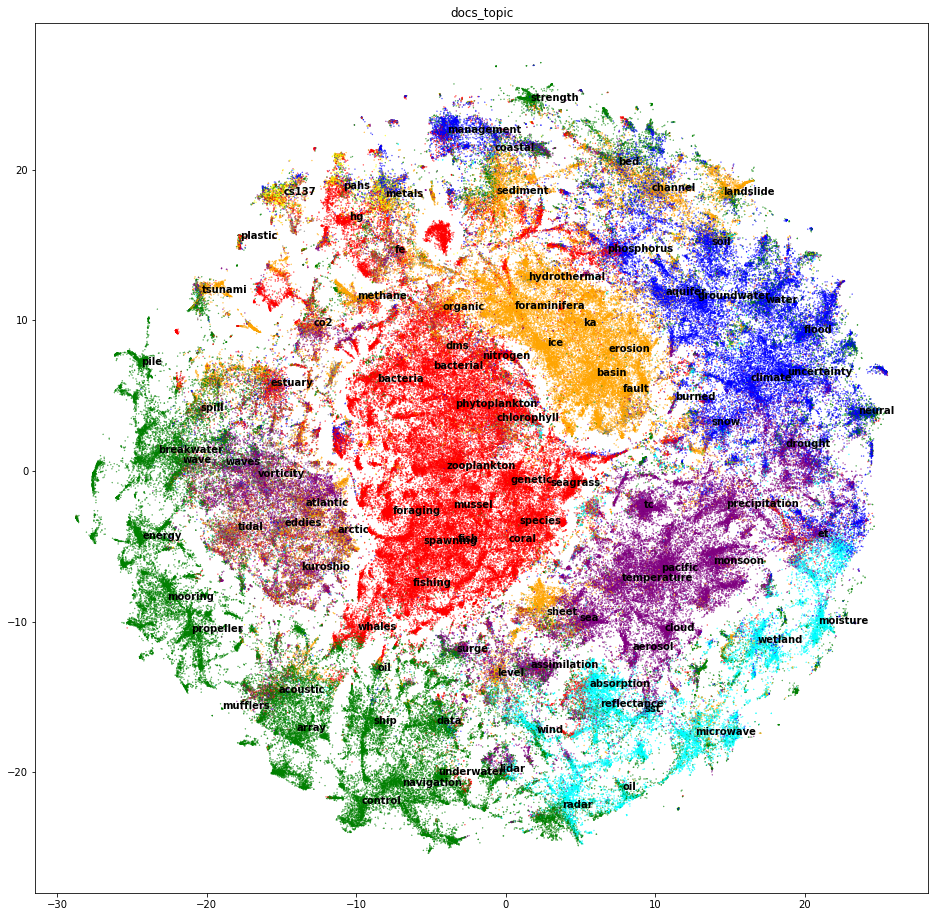

In [102]:
import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(100):
    plt.text(topic_vec[i,0], topic_vec[i,1], topic.loc[i, '0'], fontweight='bold')
plt.title('docs_topic')
plt.show()

In [ ]:
'''
105多标签分类-统计所有出现的标签频次-选取前12种标签中概率最高的一个标签
橙色：Geology 53979
绿色：Engineering 66810
红色：Marine & Freshwater Biology 82527
黄色：Environmental Sciences & Ecology 4202
紫色：Meteorology & Atmospheric Sciences 51151
蓝色：Water Resources 39347
青色：Remote Sensing 20512
橄榄色：Fisheries 468
灰色：Geochemistry & Geophysics 5794
粉色：Physical Geography 140
粉紫色：Imaging Science & Photographic Technology 413
棕色：Science & Technology - Other Topics 9422
'''

In [98]:
import collections
collections.Counter(col)

Counter({3: 82527,
         2: 66810,
         0: 39347,
         1: 53979,
         6: 20512,
         11: 51151,
         10: 4202,
         8: 468,
         5: 9422,
         4: 413,
         7: 5794,
         9: 140})

In [104]:
# 画图-独特标签
df_label = pd.read_csv('D:/abstract/wos_0531/bib_360446/sim_multilabel_withlabel.csv', engine='python')
col = list(df_label['unique_index'])
colors = ['#0000FF', '#FFA500', '#008000', '#FF0000', '#00FFFF', '#FFFF00', '#800080']
# 蓝色，橙色，绿色，红色，青色，黄色，紫色
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])

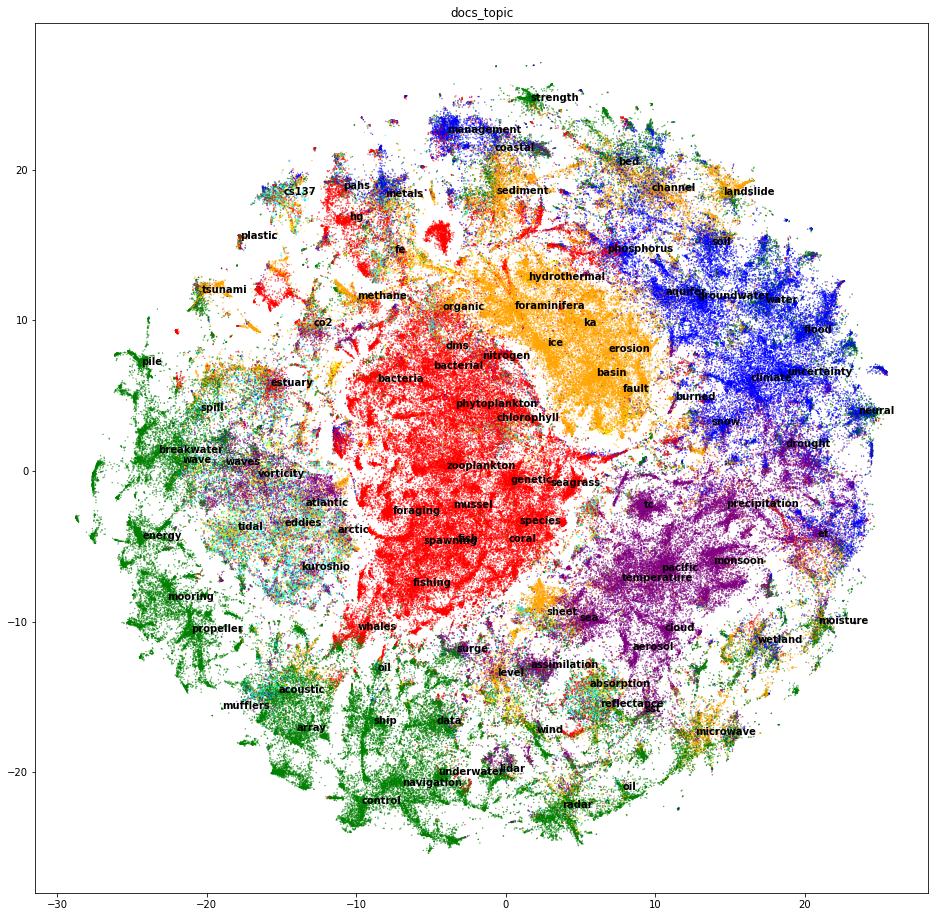

In [105]:
import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(100):
    plt.text(topic_vec[i,0], topic_vec[i,1], topic.loc[i, '0'], fontweight='bold')
plt.title('docs_topic')
plt.show()

In [106]:
import collections
collections.Counter(col)

Counter({3: 83908, 2: 74839, 0: 41172, 1: 59972, 6: 53796, 4: 13523, 5: 7555})

In [107]:
'''
105多标签分类-统计所有单独出现的标签频次-选取前7种标签中概率最高的一个标签
橙色：Geology 59972
绿色：Engineering 74839
红色：Marine & Freshwater Biology 83908
紫色：Meteorology & Atmospheric Sciences 53796
蓝色：Water Resources 41172
黄色：Geochemistry & Geophysics 7555
青色：Science & Technology - Other Topics 13523
'''

'\n105多标签分类-统计所有出现的标签频次-选取前12种标签中概率最高的一个标签\n橙色：Geology 59972\n绿色：Engineering 74839\n红色：Marine & Freshwater Biology 83908\n紫色：Meteorology & Atmospheric Sciences 53796\n蓝色：Water Resources 41172\n黄色：Geochemistry & Geophysics 7555\n青色：Science & Technology - Other Topics 13523\n'